# Fuentes

In [5]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
from pvanalytics import quality
from pvlib import temperature

## Importing data

In [6]:
#readcsv
df = pd.read_csv("df_hourly")

if not isinstance(df["Timestamp"], pd.DatetimeIndex):
        df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace=True)

In [7]:
df

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun albedo) [W/m²],Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-03-03 14:00:00+00:00,12.458333,13.073333,11.135000,12.458333,13.073333,11.135000,10.268333,10.630000,10.240000,10.696667,...,NaN,NaN,NaN,1003.753333,1003.253333,4.461667,82.649167,1.552500,197.610000,2.469167
2021-03-03 15:00:00+00:00,8.590833,8.785833,6.380000,8.590833,8.785833,6.380000,7.557500,7.977500,7.859167,8.286667,...,NaN,NaN,NaN,1002.936667,1002.436667,4.480000,82.579167,1.596667,191.633333,1.775833
2021-03-03 16:00:00+00:00,1.888333,1.929167,-0.885000,1.888333,1.929167,-0.885000,0.744167,1.030833,1.052500,1.528333,...,NaN,NaN,NaN,1002.223333,1001.723333,4.365000,86.360833,0.546667,191.410833,1.795833
2021-03-03 17:00:00+00:00,-1.303333,-1.360000,-3.855833,-1.303333,-1.360000,-3.855833,-2.788333,-2.546667,-2.190833,-1.960000,...,NaN,NaN,NaN,1002.106667,1001.606667,4.196667,91.858333,-0.874167,184.155833,1.600000
2021-03-03 18:00:00+00:00,-1.688333,-1.693333,-4.295000,-1.688333,-1.693333,-4.295000,-3.192500,-2.951667,-2.508333,-2.453333,...,NaN,NaN,NaN,1002.175833,1001.675833,4.110000,93.687500,-1.392500,175.453333,1.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 17:00:00+00:00,19.621667,19.764167,17.639167,16.685833,16.764167,16.922500,17.833333,18.133333,18.504167,19.445833,...,38.576667,78.886667,NaN,1000.157500,999.657500,7.326667,40.745000,20.730833,180.339167,0.927500
2024-08-12 18:00:00+00:00,17.195000,17.117500,14.668333,14.136667,13.927500,13.989167,15.908333,16.244167,16.157500,17.690000,...,34.410000,26.470000,NaN,1000.205833,999.705833,8.060000,47.107500,19.882500,144.799167,0.751667
2024-08-12 19:00:00+00:00,13.258333,13.238333,10.859167,10.663333,10.534167,10.565833,11.991667,12.225000,12.350833,13.950833,...,0.670000,-2.996667,NaN,1000.761667,1000.261667,8.447500,56.628333,17.557500,224.125833,1.052500


In [8]:
import matplotlib.dates as mdates

def plot_comparison(x, temp_model, temp_measured, module_name):
    if not isinstance(x, pd.DatetimeIndex):
        x = pd.to_datetime(x)

    #x = x.asfreq('h')

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 6), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
    ax1.set_title(f"Model prediction and measured temperature for {module_name}")
    ax1.plot(x, temp_model, label="Fuentes module temperature")
    ax1.plot(x, temp_measured, label="Measured module temperature")
    ax1.set_ylabel("[°C]")
    #ax2.set_title("Residuals")
    ax2.plot(x, temp_model-temp_measured)
    ax2.set_ylabel("Residuals [°C]")
    ax2.axhline(0, c="grey", linestyle=":")
    ax1.legend()
    '''ax2.xaxis.set_major_locator(mdates.AutoDateLocator())  
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha="right") '''
    plt.tight_layout()
    plt.show()

In [9]:
df.columns

Index(['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'Irradiance (SMP10 Sunpower plan) [W/m²]',
       'Irradiance (SMP10 Sunpower horisontal) [W/m²]',
       'Irradiance (SMP10 Talesun albedo) [W/m²]',
       'Irradiance (SMP10 Talesun plan) [W/m²]',
       'Irradiance (KippZonen SMP10 20201023) [W/m²]',
       'WS500_1_Air pressure abs [hPa]', 'WS500_1_Air

## Fuentes model

In [13]:
import matplotlib.dates as mdates

def plot_comparison(x, temp_model, temp_measured, save_as):
    if not isinstance(x, pd.DatetimeIndex):
        x = pd.to_datetime(x)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 5), gridspec_kw={'height_ratios': [1.9, 1]}, sharex=True)
    ax1.plot(x, temp_model, label="Estimated module temperature")
    ax1.plot(x, temp_measured, label="Measured module temperature")
    ax1.set_ylabel("Temperature [°C]", fontsize=12)
    ax1.tick_params(which="both", direction='in')
    
    ax2.plot(x, temp_model-temp_measured)
    ax2.set_ylabel("Residuals [°C]", fontsize=12)
    ax2.axhline(0, c="grey", linestyle=":")
    ax1.legend(fontsize=12)
    
    ax2.xaxis.set_major_locator(mdates.HourLocator(byhour=12))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax2.xaxis.set_minor_locator(mdates.HourLocator(byhour=[3, 9, 15, 21]))#interval=6))  # 0, 6, 12, 18 hours
    ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0, fontsize=12)
    plt.setp(ax2.xaxis.get_minorticklabels(), rotation=0, fontsize=10, color="gray")

    ax2.tick_params(axis='x', which='major', pad=20, direction="in")
    ax2.tick_params(axis='x', which='minor', pad=5, labelsize=10, labelcolor="gray", direction="in", labelrotation=0)

    plt.tight_layout()
    plt.savefig("img/fuentes/"+save_as, bbox_inches='tight')
    plt.show()

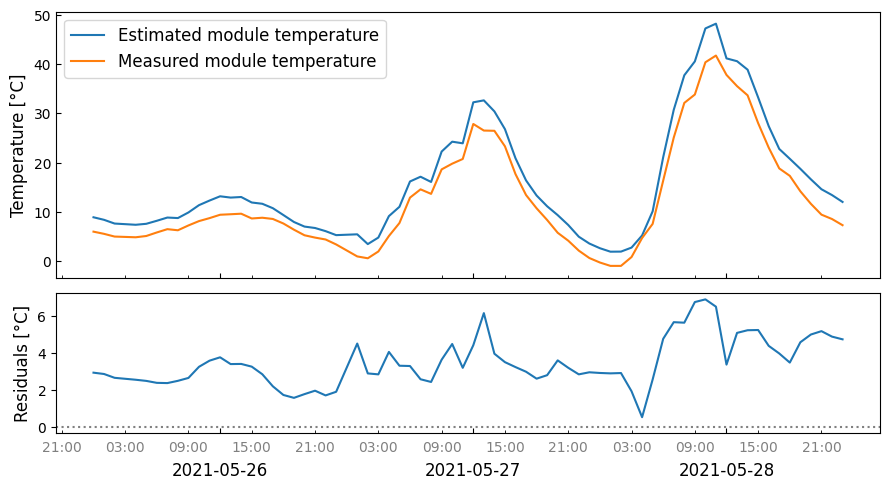

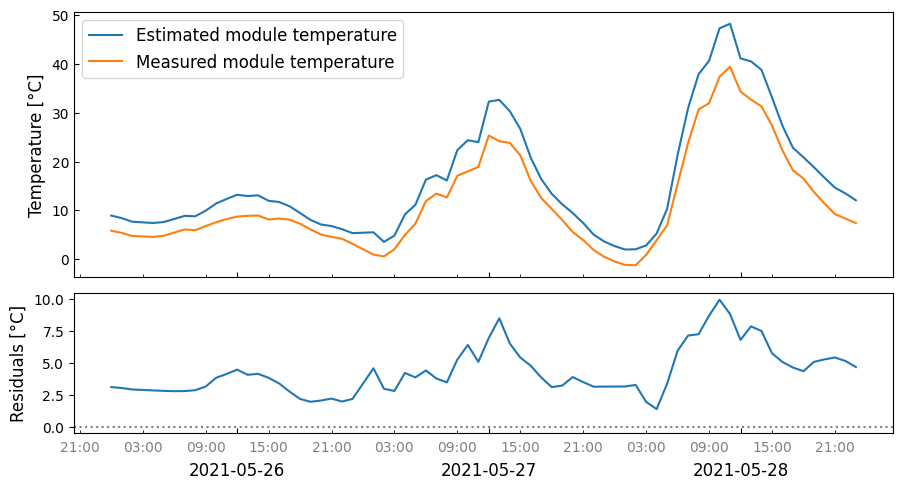

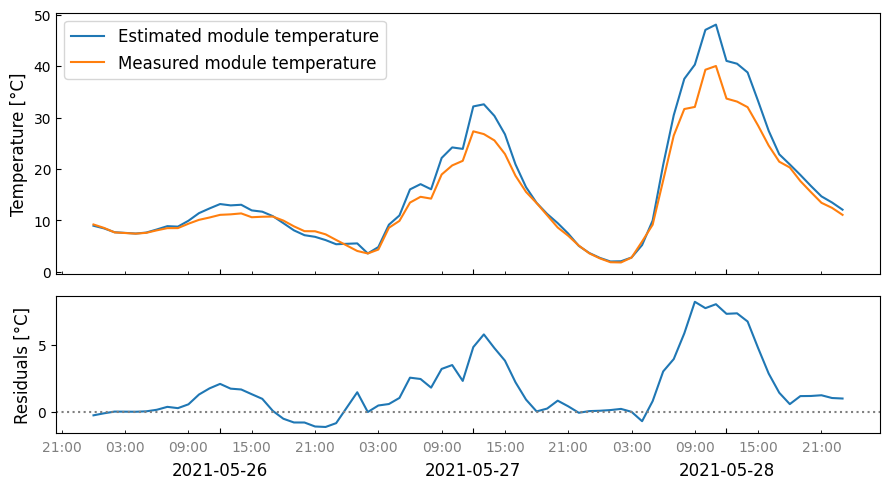

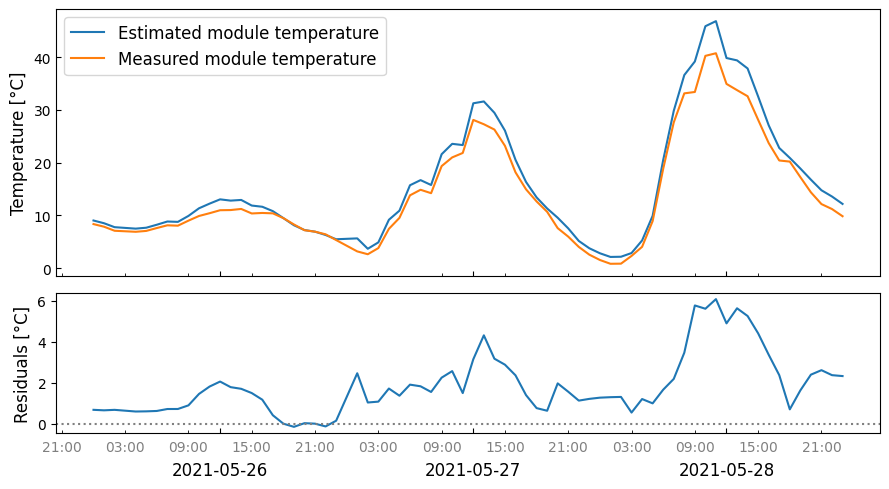

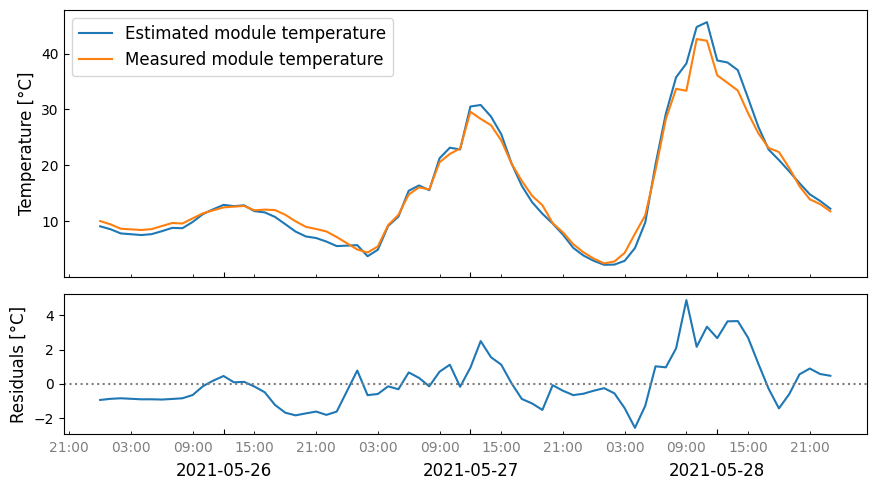

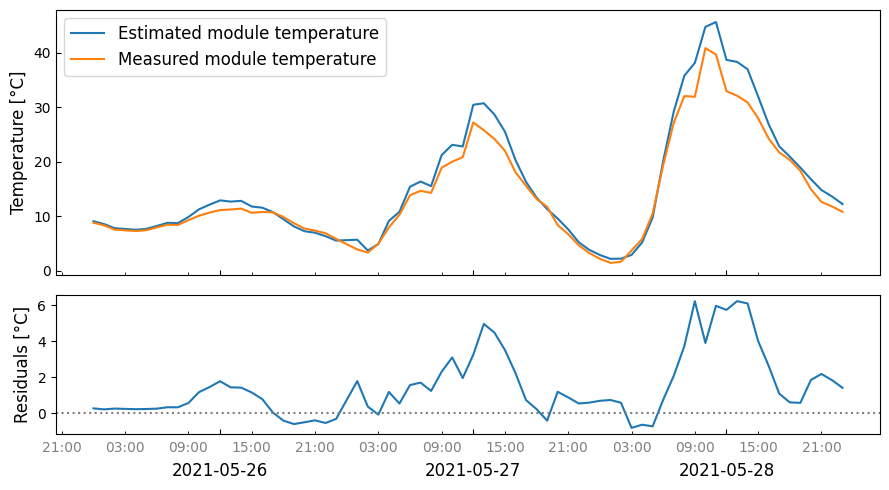

In [16]:
datea = '2021-05-26'
dateb = '2021-05-28'

#JKM325
temp_fuentes1 = temperature.fuentes(df['Irradiance (IRR Plan - JKM325) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=45, module_height=0.725+0.3536*1.665, wind_height=4, surface_tilt=45, module_width=1.002, module_length=1.665)
plot_comparison(df.loc[datea:dateb].index, temp_fuentes1.loc[datea:dateb], df["PT JKM325 nr 3 [°C]"].loc[datea:dateb], 'PT JKM325 nr 3')
#JKM335
temp_fuentes2 = temperature.fuentes(df['Irradiance (IRR Plan - JKM335) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=45, module_height=0.725+0.3536*1.684, wind_height=4, surface_tilt=45, module_width=1.002, module_length=1.684)
plot_comparison(df.loc[datea:dateb].index, temp_fuentes2.loc[datea:dateb], df["PT JKM335 nr 3 [°C]"].loc[datea:dateb], 'PT JKM335 nr 3')
#SunP
temp_fuentes3 = temperature.fuentes(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=45, module_height=0.725+0.3536*1.690, wind_height=4, surface_tilt=45, module_width=1.046, module_length=1.690)
plot_comparison(df.loc[datea:dateb].index, temp_fuentes3.loc[datea:dateb], df['PT SunP nr 2 [°C]'].loc[datea:dateb], 'PT SunP nr 2')
#REC Alpha
temp_fuentes4 = temperature.fuentes(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=44, module_height=0.725+0.3536*1.721, wind_height=4, surface_tilt=45, module_width=1.016, module_length=1.721)
plot_comparison(df.loc[datea:dateb].index, temp_fuentes4.loc[datea:dateb], df['PT REC nr 3 [°C]'].loc[datea:dateb], 'PT REC nr 3')
#Talesun FrLess
temp_fuentes5 = temperature.fuentes(df["Irradiance (IRR Plan - Talesun) [W/m²]"], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=43, module_height=0.725+0.3536*1.645, wind_height=4, surface_tilt=45, module_width=1.005, module_length=1.645)
plot_comparison(df.loc[datea:dateb].index, temp_fuentes5.loc[datea:dateb], df["PT Talesun FrLess 1 [°C]"].loc[datea:dateb], "PT Talesun FrLess 1")
#Talesun
temp_fuentes6 = temperature.fuentes(df["Irradiance (IRR Plan - Talesun) [W/m²]"], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=43, module_height=0.725+0.3536*1.715, wind_height=4, surface_tilt=45, module_width=1.045, module_length=1.715)
plot_comparison(df.loc[datea:dateb].index, temp_fuentes6.loc[datea:dateb], df["PT Talesun 3 [°C]"].loc[datea:dateb], "PT Talesun 3")


### RMSE

In [8]:
def rmse(model_results, measured_temp):
    #Creating 
    df_temp = pd.DataFrame({'model_results': model_results, 'measured_temp': measured_temp})
    df_temp = df_temp.dropna(how="any")

    #Calculating RMSE
    rmse = np.sqrt(((df_temp["model_results"] - df_temp["measured_temp"])**2).mean())
    return rmse

In [9]:
RMSE1 = rmse(temp_fuentes1, df["PT JKM325 nr 3 [°C]"])
RMSE2 = rmse(temp_fuentes2, df["PT JKM335 nr 3 [°C]"])
RMSE3 = rmse(temp_fuentes3, df['PT SunP nr 2 [°C]'])
RMSE4 = rmse(temp_fuentes4, df['PT REC nr 3 [°C]'])
RMSE5 = rmse(temp_fuentes5, df["PT Talesun FrLess 1 [°C]"])
RMSE6 = rmse(temp_fuentes6, df["PT Talesun 3 [°C]"])

### MBE

In [10]:
def MBE(model_results, measured_temp): 
    df_temp = pd.DataFrame({'model_results': model_results, 'measured_temp': measured_temp})
    df_temp = df_temp.dropna(how="any")

    #Calculating MBE
    mbe = (1/len(df_temp["model_results"])) * np.sum(df_temp["model_results"] - df_temp["measured_temp"]) #np.sqrt(((df_temp["model_results"] - df_temp["measured_temp"])**2).mean())
    return mbe

In [11]:
MBE1 = MBE(temp_fuentes1, df["PT JKM325 nr 3 [°C]"])
MBE2 = MBE(temp_fuentes2, df["PT JKM335 nr 3 [°C]"])
MBE3 = MBE(temp_fuentes3, df['PT SunP nr 2 [°C]'])
MBE4 = MBE(temp_fuentes4, df['PT REC nr 3 [°C]'])
MBE5 = MBE(temp_fuentes5, df["PT Talesun FrLess 1 [°C]"])
MBE6 = MBE(temp_fuentes6, df["PT Talesun 3 [°C]"])

In [12]:
results = pd.DataFrame({
    "Module": ["PT JKM325 nr 3", "PT JKM335 nr 3", "PT SunP nr 2", "PT REC nr 3", "PT Talesun FrLess 1", "PT Talesun 3" ],
    "RMSE": [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6],
    "MBE": [MBE1, MBE2, MBE3, MBE4, MBE5, MBE6]
})

In [13]:
results.to_csv('Fuentes_results.csv', index=False)